In [829]:
%matplotlib inline

In [830]:
from matplotlib import pyplot as plt 
import numpy as np

In [831]:
data = [[3,1.5,1    ],# matrix w/ dataset for neural train
        [2, 1 ,0    ], 
        [4, 1.5, 1  ], 
        [3,1,0      ],
        [3.5,.5, 1  ] , 
        [ 2, .5 , 0 ], 
        [ 5.5 , 1, 1], 
        [ 1 ,1 ,0  ]]
mystery_flower = [4.5, 1] #thats unknown color for neural

In [832]:
data[0]

[3, 1.5, 1]

In [833]:
data[1]

[2, 1, 0]

In [834]:
data[0][0] #how to call the data

3

In [835]:
#_______________________________________________________________

In [836]:
#neural looks like 
 
#output    o    only in [-1,1]
#    w1 /  |w2\ w3 any?
#      o   o   o b.input= 1 , and 2 first circles it's the data which u give to neural

In [837]:
w1 = np.random.randn() 
w2 = np.random.randn() 
b = np.random.randn()

In [838]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 
 
def sigmoid_p(x): 
    return sigmoid(x)* (1-sigmoid(x)) #тут у нас производная сигмоидной функции

In [839]:
T = np.linspace(-5 , 5, 10) #Функция linspace() возвращает одномерный массив из указанного количества элементов, значения которых равномерно распределенны внутри заданного интервала.
T
#если коротко то тут от - 5 до 5 10 элементов

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [840]:
Y = sigmoid(T)
Y# все эти значения теперь у нас от [-1,1]

array([0.00669285, 0.02005754, 0.0585369 , 0.1588691 , 0.36457644,
       0.63542356, 0.8411309 , 0.9414631 , 0.97994246, 0.99330715])

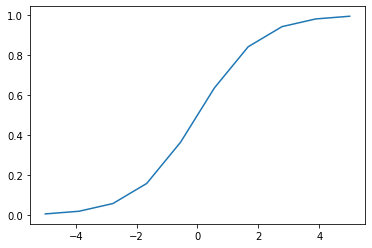

In [841]:
plt.plot(T,Y)#строим график функции 
# повышая в linspace последнее значение мы увеличиваем плавность функции. 
# повышая первые два значения мы делаем функцию более приближенной к y

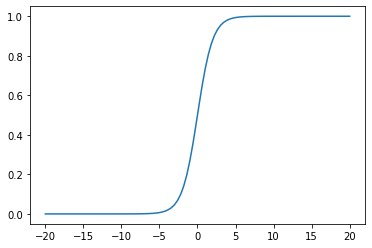

In [842]:
T = np.linspace(-20 , 20, 100) 
Y = sigmoid(T) 
plt.plot(T,Y)

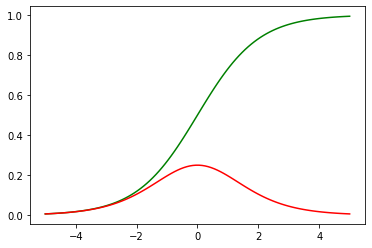

In [843]:
T = np.linspace(-5 , 5, 100) #график другой функции.
Y = sigmoid_p(T) 
plt.plot(T,sigmoid(T), c = 'g') 
plt.plot(T,sigmoid_p(T), c = 'r')

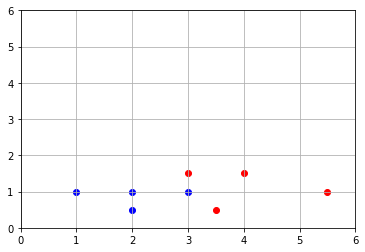

In [844]:
#scatter data 
plt.axis([0,6,0,6]) # x.min x.max y.miny.max
plt.grid()#сетка
for i in range(len(data)): 
    point = data[i]  
    color = "r" 
    if point[2] == 0:# какие цвета у нас в массиве ,такие и тут
         color = "b"
    plt.scatter(point[0],point[1],c=color)

Weight 1 in  0 epoch = 2.0976573165992343
Weight 2 in  0 epoch = 1.2716432436800562
B in  0 epoch = 0.2130687620701713
cost in  0 epoch = 4.890830861101806e-12
-------------------------------
Weight 1 in  5000 epoch = 5.626923543650015
Weight 2 in  5000 epoch = 1.4176486550346545
B in  5000 epoch = -16.65922473800299
cost in  5000 epoch = 1.1823821442304985e-07
-------------------------------
Weight 1 in  10000 epoch = 6.988513075428977
Weight 2 in  10000 epoch = 3.576897451491425
B in  10000 epoch = -23.296213073214805
cost in  10000 epoch = 0.0027826663248042443
-------------------------------
Weight 1 in  15000 epoch = 9.166195583998693
Weight 2 in  15000 epoch = 3.483254857837254
B in  15000 epoch = -29.899351457564162
cost in  15000 epoch = 0.0036159759902816093
-------------------------------
Weight 1 in  20000 epoch = 10.695274699690172
Weight 2 in  20000 epoch = 4.248917459955806
B in  20000 epoch = -36.827581655442415
cost in  20000 epoch = 0.15825115141689222
----------------

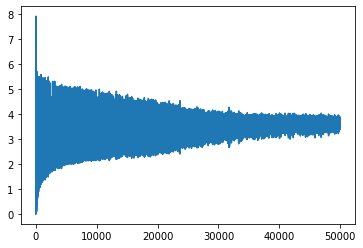

In [845]:
#training loop 
learning_rate = 0.9 
costs=[]
w1 = np.random.randn() 
w2 = np.random.randn() 
b = np.random.randn()
for i in range (50000):
    ri = np.random.randint(len(data)) 
    point = data[ri] 
    # мы будем обновлять веса для уменьшения ошибки в вичислениях
    z = point[0] * w1 + point[1] * w2 + b 
    prediction = sigmoid(z) # так как z- наше значение на выходе,оно не может быть больше 1 и меньше -1 
     
    target = point[2]
    cost = np.square(prediction - target) 
     
    #costs.append(cost)
    
    dcost_pred = 2 * (prediction - target) 
    dpred_dz = sigmoid_p(z) 
    
    dz_dw1 = point[0]
    dz_dw2 = point[1] 
    dz_db = 1
     
    dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
    dcost_db = dcost_pred * dpred_dz * dz_db
     
    w1 -= learning_rate*dcost_dw1
    w2 -= learning_rate*dcost_dw2 
    b -= learning_rate*dcost_db 
     
    if i % 5000 == 0:
        print ("Weight 1 in " ,i , "epoch =", w1) 
        print ("Weight 2 in " ,i , "epoch =", w2) 
        print ("B in " ,i , "epoch =", b) 
        print ("cost in " ,i , "epoch =", cost) 
        print ("-------------------------------") 
        
    cost_sum = 0 
    for j in range(len(data)): 
        point = data[j] 
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) 
        cost_sum += np.square(pred - target)
    costs.append(cost_sum) 
    
plt.plot(costs)
    

In [846]:
nostra = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b

In [847]:
if sigmoid(nostra) >=0.5:
    print("Looks like red, because predict = " ,sigmoid(nostra))
else:
    print("Yeah that blue , because predict = " ,sigmoid(nostra))

Looks like red, because predict =  0.9999999997253348


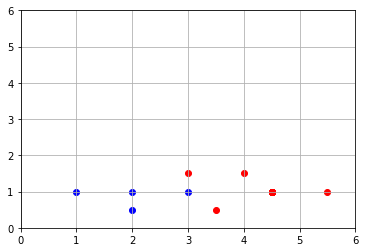

In [848]:
#scatter data 
plt.axis([0,6,0,6]) # x.min x.max y.miny.max
plt.grid()#сетка
for i in range(len(data)): 
    point = data[i]  
    color = "r" 
    if point[2] == 0:# какие цвета у нас в бд ,такие и тут
         color = "b"
    plt.scatter(point[0],point[1],c=color)
    color = "r" 
    if sigmoid(nostra) == 0:# какие цвета у нас в бд ,такие и тут
         color = "b"
    plt.scatter(mystery_flower[0],mystery_flower[1],c=color)

In [849]:
for i in range(len(data)): 
    point = data[i] 
    z = point[0] * w1 + point[1] * w2 + b 
    pred=sigmoid(z)
    print(data[i])
    print("pred:{}".format(pred))

[3, 1.5, 1]
pred:0.9076525181141476
[2, 1, 0]
pred:3.9801620577930255e-08
[4, 1.5, 1]
pred:0.9999999832895875
[3, 1, 0]
pred:0.19506517933526057
[3.5, 0.5, 1]
pred:0.936482003586832
[2, 0.5, 0]
pred:9.813529886162598e-10
[5.5, 1, 1]
pred:1.0
[1, 1, 0]
pred:6.537060567529776e-15
